In [75]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
import statsmodels.api as sm
from sklearn import preprocessing
'exec(% matplotlib inline)'
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns


In [76]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [77]:
# dataset
disease_df = pd.read_csv("/content/drive/MyDrive/heart diseases/framingham.csv")
disease_df.drop(['education'], inplace = True, axis = 1)
disease_df.rename(columns ={'male':'Sex_male'}, inplace = True)

In [78]:
# removing NaN / NULL values
disease_df.dropna(axis = 0, inplace = True)
print(disease_df.head(), disease_df.shape)
print(disease_df.TenYearCHD.value_counts())

   Sex_male  age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0         1   39              0         0.0     0.0                0   
1         0   46              0         0.0     0.0                0   
2         1   48              1        20.0     0.0                0   
3         0   61              1        30.0     0.0                0   
4         0   46              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           

In [79]:
from sklearn.utils import resample
import pandas as pd

# Assume df is your dataset with 'target' as the label column
df_majority = disease_df[disease_df.TenYearCHD == 0]  # Majority class
df_minority = disease_df[disease_df.TenYearCHD == 1]  # Minority class

# Upsample the minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,  # Sample with replacement
                                 n_samples=len(df_majority),  # Match majority class
                                 random_state=42)  # For reproducibility

# Combine majority and upsampled minority class
disease_df = pd.concat([df_majority, df_minority_upsampled])

# Shuffle the dataset
disease_df = disease_df.sample(frac=1, random_state=42).reset_index(drop=True)

print(disease_df['TenYearCHD'].value_counts())  # Check class distribution


TenYearCHD
1    3179
0    3179
Name: count, dtype: int64


In [80]:
X = np.asarray(disease_df[['age', 'Sex_male', 'cigsPerDay',
                           'totChol', 'sysBP', 'glucose']])
y = np.asarray(disease_df['TenYearCHD'])

# normalization of the dataset
X = preprocessing.StandardScaler().fit(X).transform(X)

# Train-and-Test -Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size = 0.2, random_state = 42)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (5086, 6) (5086,)
Test set: (1272, 6) (1272,)


<ipython-input-81-bc59419c8daf>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TenYearCHD', data=disease_df,


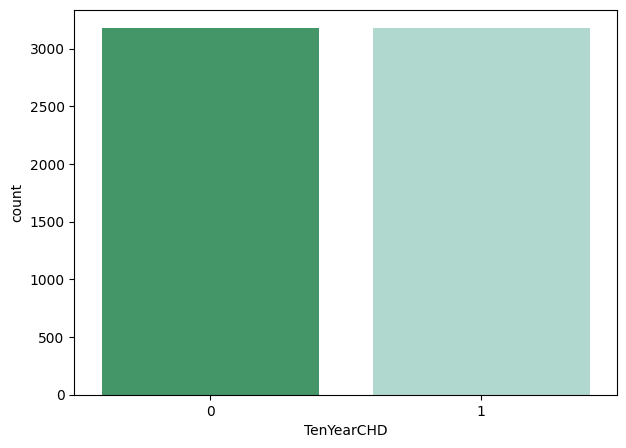

In [81]:
# counting no. of patients affected with CHD
plt.figure(figsize=(7, 5))
sns.countplot(x='TenYearCHD', data=disease_df,
             palette="BuGn_r")
plt.show()

# This code is modified by Susobhan Akhuli

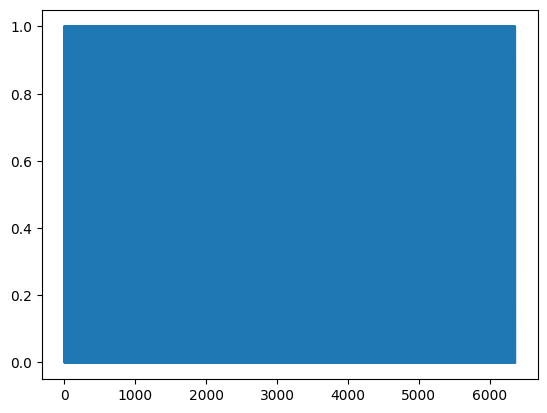

In [82]:
laste = disease_df['TenYearCHD'].plot()
plt.show(laste)

Logistic Regression

In [83]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)


In [84]:
# Evaluation and accuracy
from sklearn.metrics import accuracy_score
print('Accuracy of the model is =',
      accuracy_score(y_test, y_pred))


Accuracy of the model is = 0.6761006289308176


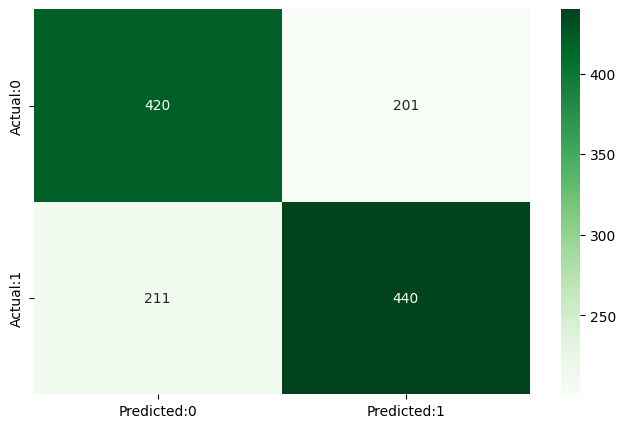

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.67      0.68      0.67       621
           1       0.69      0.68      0.68       651

    accuracy                           0.68      1272
   macro avg       0.68      0.68      0.68      1272
weighted avg       0.68      0.68      0.68      1272



In [85]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])

plt.figure(figsize = (8, 5))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens")

plt.show()
print('The details for confusion matrix is =')
print (classification_report(y_test, y_pred))

# This code is modified by Susobhan Akhuli


Linear Regression


In [86]:
from sklearn.linear_model import LinearRegression
logreg = LinearRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)


In [87]:
y_pred_class = (y_pred > 0.5).astype(int)  # If it's binary classification
print('Accuracy of the model is =', accuracy_score(y_test, y_pred_class))


Accuracy of the model is = 0.675314465408805


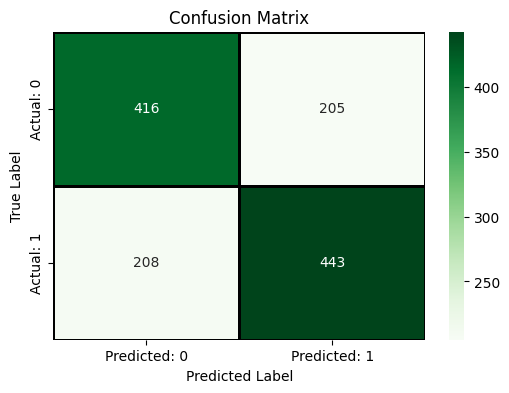

The details for confusion matrix:
              precision    recall  f1-score   support

           0       0.67      0.67      0.67       621
           1       0.68      0.68      0.68       651

    accuracy                           0.68      1272
   macro avg       0.68      0.68      0.68      1272
weighted avg       0.68      0.68      0.68      1272



In [88]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Convert continuous predictions to binary class labels
y_pred_class = (y_pred > 0.5).astype(int)  # For binary classification (0 or 1)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_class)

# Create a DataFrame for better visualization
conf_matrix = pd.DataFrame(
    data=cm,
    columns=['Predicted: 0', 'Predicted: 1'],
    index=['Actual: 0', 'Actual: 1']
)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Greens", linewidths=1, linecolor='black')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")

# Show the plot
plt.show()

# Print the classification report
print("The details for confusion matrix:")
print(classification_report(y_test, y_pred_class))

# Modified by Susobhan Akhuli


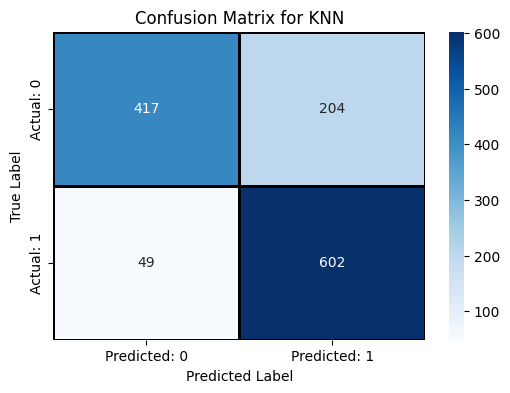

Accuracy of the KNN model: 0.8011006289308176
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.67      0.77       621
           1       0.75      0.92      0.83       651

    accuracy                           0.80      1272
   macro avg       0.82      0.80      0.80      1272
weighted avg       0.82      0.80      0.80      1272



In [89]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Initialize KNN classifier with k=5 (you can change k)
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model on training data
knn.fit(X_train, y_train)

# Predict the classes for test data
y_pred = knn.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(cm,
                           columns=['Predicted: 0', 'Predicted: 1'],
                           index=['Actual: 0', 'Actual: 1'])

# Visualizing the Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", linewidths=1, linecolor='black')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for KNN")
plt.show()

# Print accuracy and classification report
print("Accuracy of the KNN model:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


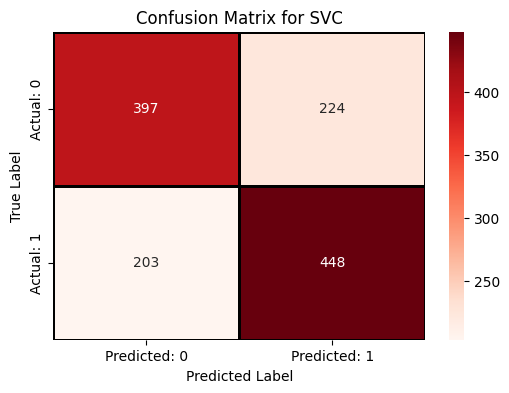

Accuracy of the SVC model: 0.664308176100629
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.64      0.65       621
           1       0.67      0.69      0.68       651

    accuracy                           0.66      1272
   macro avg       0.66      0.66      0.66      1272
weighted avg       0.66      0.66      0.66      1272



In [90]:
# Import necessary libraries
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Initialize the SVC model with default parameters
svc = SVC(kernel='linear')  # You can try other kernels like 'rbf', 'poly', or 'sigmoid'

# Train the model
svc.fit(X_train, y_train)

# Predict class labels
y_pred = svc.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(cm,
                           columns=['Predicted: 0', 'Predicted: 1'],
                           index=['Actual: 0', 'Actual: 1'])

# Visualizing the Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Reds", linewidths=1, linecolor='black')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for SVC")
plt.show()

# Print accuracy and classification report
print("Accuracy of the SVC model:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


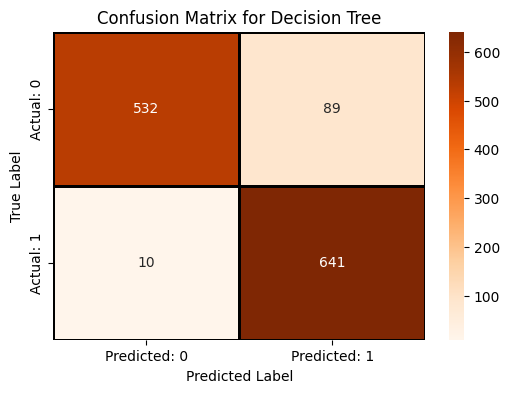

Accuracy of the Decision Tree model: 0.9221698113207547
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.86      0.91       621
           1       0.88      0.98      0.93       651

    accuracy                           0.92      1272
   macro avg       0.93      0.92      0.92      1272
weighted avg       0.93      0.92      0.92      1272



In [91]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Initialize Decision Tree classifier
dt = DecisionTreeClassifier(criterion='gini', max_depth=None, random_state=42)
# Use criterion='entropy' for information gain instead of Gini impurity

# Train the model on training data
dt.fit(X_train, y_train)

# Predict the classes for test data
y_pred = dt.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(cm,
                           columns=['Predicted: 0', 'Predicted: 1'],
                           index=['Actual: 0', 'Actual: 1'])

# Visualizing the Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Oranges", linewidths=1, linecolor='black')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Decision Tree")
plt.show()

# Print accuracy and classification report
print("Accuracy of the Decision Tree model:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


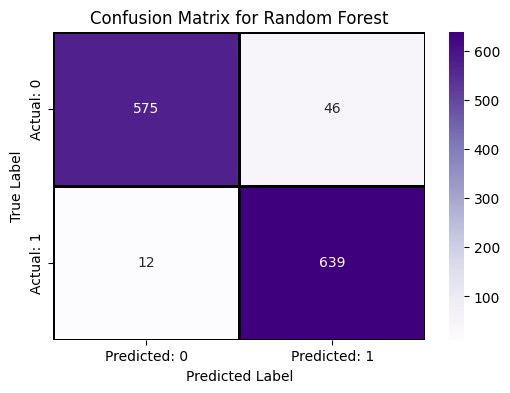

Accuracy of the Random Forest model: 0.9544025157232704


In [92]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Initialize Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, random_state=42)
# You can set n_estimators=200 or tune max_depth for better performance

# Train the model on training data
rf.fit(X_train, y_train)

# Predict the classes for test data
y_pred = rf.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(cm,
                           columns=['Predicted: 0', 'Predicted: 1'],
                           index=['Actual: 0', 'Actual: 1'])

# Visualizing the Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Purples", linewidths=1, linecolor='black')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Random Forest")
plt.show()

# Print accuracy and classification report
print("Accuracy of the Random Forest model:", accuracy_score(y_test, y_pred))